# Problem 2 PageRank and Eigenvectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Problem 2.1 Representing undirected graphs by matrices

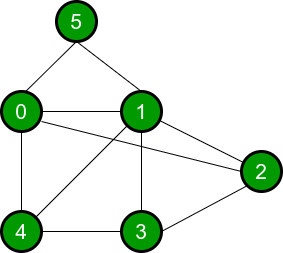

In [2]:
# Initialize the unnormalized matrix G
G = np.array([[0, 1, 1, 0, 0, 0],
              [1, 0, 0, 1, 0, 0],
              [1, 0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0, 1],
              [0, 0, 1, 0, 0, 1],
              [0, 0, 0, 1, 1, 0]])

print("Matrix generated based on the network above is")
print(G)

Matrix generated based on the network above is
[[0 1 1 0 0 0]
 [1 0 0 1 0 0]
 [1 0 0 1 1 0]
 [0 1 1 0 0 1]
 [0 0 1 0 0 1]
 [0 0 0 1 1 0]]


In [3]:
# Please finish the normalization function here
def normalize_graph(G):
  # Calculate column sums
  col_sums = np.sum(G, axis=0)

  # Normalize each column vector in G
  G_N = G / col_sums[np.newaxis, :]
  return G_N

In [4]:
G_N = normalize_graph(G)
print("The matrix after normalization is:")
print(G_N)

The matrix after normalization is:
[[0.         0.5        0.33333333 0.         0.         0.        ]
 [0.5        0.         0.         0.33333333 0.         0.        ]
 [0.5        0.         0.         0.33333333 0.5        0.        ]
 [0.         0.5        0.33333333 0.         0.         0.5       ]
 [0.         0.         0.33333333 0.         0.         0.5       ]
 [0.         0.         0.         0.33333333 0.5        0.        ]]


## Problem 2.2 Finding the importance vector

### Please use the matrix G_N from Problem 2.1

In [5]:
def find_importance_vector(G_N):
    # Initialize importance vector vnew
    n = G_N.shape[0]
    vnew = np.ones(n) / n

    # Initialize vold
    vold = vnew.copy()

    # Iterate until convergence
    while True:
        # Update the importance vector using Eq. (2)
        vnew = np.dot(G_N, vold)

        # Normalize vnew so that its elements sum to 1
        vnew = vnew / np.sum(vnew)

        # Check for convergence
        if np.linalg.norm(vold - vnew) / np.linalg.norm(vold) <= 1e-6:
            break

        # Update vold
        vold = vnew.copy()

    return vnew

In [6]:
v = find_importance_vector(G_N)  # v is the resulting vector from the loop.
print("The important vector found is:\{}".format(v))

The important vector found is:\[0.14285716 0.14285716 0.21428569 0.21428569 0.14285716 0.14285716]


In [7]:
# v should be close to
# [0.2 ,0.25, 0.15, 0.15, 0.15, 0.1 ]^⊺ (Updated here)
# there could exist some small difference between your result and this vector

# Here you need to check the relative difference
# between v you generated and v_hat
v_hat = np.array(
    [[0.2 ,0.25, 0.15, 0.15, 0.15, 0.1 ]] #Updated here
    ).T
print("Given v_hat is \n{}".format(v_hat))
relative_dist = np.linalg.norm(v - v_hat) / np.linalg.norm(v)
print("The relative dist between v and v_hat is {}".format(relative_dist))

Given v_hat is 
[[0.2 ]
 [0.25]
 [0.15]
 [0.15]
 [0.15]
 [0.1 ]]
The relative dist between v and v_hat is 0.8345479857873194


## 2.3 PageRank vector

In [8]:
# A new unnormalized matrix G is given:
np.random.seed(2033)
G_half = np.random.randint(0,2,(100, 100))
G = (G_half+G_half.T)
G = (np.sign(G))
G = G.astype(np.float32)
for i in range(100):
  G[i, i] = 0.
print(np.linalg.norm(G-G.T))
print(G)

0.0
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 1. 0.]]


In [9]:
def normalize_graph(G):
    # Normalize each column vector in G
    column_sums = np.sum(G, axis=0)
    G_N = G / column_sums[np.newaxis, :]
    return G_N

# Compute the normalized matrix G_N
G_N = normalize_graph(G)

In [10]:
# Step (b)
# Use the built-in function np.linalg.eig to find the eigenvector corresponding
# to the eigenvalue = 1
# Compute the eigenvalues and eigenvectors of G_N
w, V = np.linalg.eig(G_N)

# Find the index of the eigenvalue closest to 1
index = np.argmax(np.abs(w - 1))

# Get the corresponding eigenvector
eigen_vector = V[:, index]#
print("Eigenvector found (while eigenvalue = 1) is: ")
print(eigen_vector)

Eigenvector found (while eigenvalue = 1) is: 
[ 0.07810133 -0.07132186 -0.1636285  -0.13461618  0.0584067  -0.15149993
 -0.02330441 -0.03642068  0.1775974  -0.08802859 -0.02946285  0.01219669
 -0.03686927 -0.01738917  0.02587559 -0.15512592 -0.12199821  0.01930217
  0.12732935  0.07920904 -0.08781371  0.14360471 -0.00377656 -0.00399477
 -0.0244974  -0.03183836  0.07435356 -0.10547192  0.25515708  0.06061253
 -0.02840349  0.14259169  0.11706338  0.02798509 -0.13804789 -0.02389602
 -0.16592127 -0.20487298  0.07071041 -0.02189911 -0.05814295 -0.10226265
 -0.02738918 -0.06590459  0.04676348 -0.11160176 -0.03777764  0.09927927
  0.07268732  0.11274716  0.10762618 -0.06535211 -0.01727731  0.06491382
 -0.07878839 -0.03033375  0.04034246  0.15096779 -0.04706989 -0.0910676
  0.08443601  0.02878115  0.03863917  0.05242154  0.02174857  0.12921742
 -0.06354725  0.11857251 -0.05863885 -0.17212293 -0.17802338  0.04506562
 -0.11050726 -0.1349483   0.05190776 -0.10209825  0.06522569 -0.00169189
 -0.03

In [11]:
# Step (c)
# Fix the eigenvector correponding to the eigenvalue = 1 from V
# according to the code hints in 2.3 (c) on Page 5 of pdf file
# Make all values nonnegative
v_abs = np.abs(eigen_vector)

# Sum all absolute values to obtain the sum of all values
sum_abs = np.sum(v_abs)

# Rescale the eigenvector to ensure the sum of all values equals 1
v_PageRank = v_abs / sum_abs
print("Page Rank Vector is:")
print(v_PageRank)

Page Rank Vector is:
[0.00938876 0.00857378 0.01967019 0.01618255 0.00702121 0.01821218
 0.00280148 0.00437822 0.02134942 0.01058214 0.0035418  0.00146619
 0.00443215 0.0020904  0.00311057 0.01864807 0.01466571 0.00232036
 0.01530658 0.00952192 0.0105563  0.01726308 0.00045399 0.00048022
 0.00294489 0.00382737 0.00893823 0.01267904 0.03067307 0.00728638
 0.00341445 0.0171413  0.01407248 0.00336416 0.01659508 0.0028726
 0.01994581 0.02462829 0.00850027 0.00263255 0.00698951 0.01229325
 0.00329252 0.00792256 0.00562155 0.01341592 0.00454134 0.01193461
 0.00873792 0.01355362 0.01293801 0.00785614 0.00207695 0.00780345
 0.00947135 0.0036465  0.00484967 0.01814821 0.00565839 0.01094746
 0.01015026 0.00345985 0.00464491 0.00630172 0.00261445 0.01553355
 0.00763917 0.0142539  0.00704912 0.02069132 0.02140063 0.00541745
 0.01328435 0.01622247 0.00623996 0.01227348 0.00784094 0.00020339
 0.0037415  0.0159382  0.00831249 0.01782574 0.00630934 0.01472036
 0.01072081 0.0171239  0.00552596 0.010889

In [12]:
# Use your find_importance_vector() to generate imp_vec
# check relative distance between imp_vec and v_PageRank
# should be close to 0 (non-negative values less than 1e-5 are acceptable)
# Compute the importance vector using find_importance_vector()
imp_vec = find_importance_vector(G_N)

# Calculate the relative distance between imp_vec and v_PageRank
relative_dist = np.linalg.norm(imp_vec - v_PageRank) / np.linalg.norm(v_PageRank)
print("Relative Dist between imp_vec and v_PageRank is {}".format(relative_dist))
print("importance vector is \n{}".format(imp_vec))

Relative Dist between imp_vec and v_PageRank is 0.5660851116110263
importance vector is 
[0.01060936 0.00952122 0.00924918 0.01088139 0.00884113 0.00979325
 0.00979325 0.01128944 0.01006529 0.01006529 0.0093852  0.00965724
 0.01047334 0.01128944 0.0093852  0.01006529 0.0093852  0.00979325
 0.01074538 0.01033732 0.01033732 0.00965724 0.01047334 0.01033732
 0.00952122 0.00992927 0.01006529 0.01074537 0.00965724 0.01020131
 0.01047334 0.01088139 0.00897715 0.00924918 0.01006529 0.01074537
 0.00952122 0.00992927 0.0093852  0.00965724 0.01020131 0.01033732
 0.01047334 0.01047334 0.00911317 0.01060936 0.01101741 0.00979325
 0.00992927 0.00952122 0.01088139 0.01006529 0.01047334 0.01020131
 0.00992927 0.01006529 0.00952122 0.00952122 0.01074537 0.01033732
 0.01033732 0.01020131 0.00884113 0.00911317 0.01020131 0.00897715
 0.01047334 0.00965724 0.00979325 0.01060936 0.0093852  0.01128944
 0.00992927 0.0093852  0.00924918 0.00952122 0.01047334 0.01047334
 0.00911317 0.00897715 0.01115343 0.0092

In [13]:
# Find the indices of the 5 most important webpages from v_PageRank
# i.e., find the largest 5 elements from v_PageRank
# Find the indices of the 5 largest elements in v_PageRank
ind_top_5 = np.argsort(-v_PageRank)[:5]
print("Top 5 indices are: ")
print(ind_top_5)

Top 5 indices are: 
[94 28 37 90 70]
